In [1]:
import pulp
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
train = pd.DataFrame.from_csv('train.csv')

train


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  """Entry point for launching an IPython kernel.


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,60,services,married,tertiary,no,4256,yes,no,cellular,16,aug,239,3,761,1,other,yes
1,25,student,single,secondary,no,154,no,no,cellular,3,mar,141,1,180,2,failure,yes
2,38,services,married,secondary,no,507,yes,no,cellular,17,apr,55,1,344,1,failure,no
3,40,management,single,tertiary,no,1361,no,no,cellular,29,jan,1473,1,-1,0,unknown,yes
4,39,technician,married,secondary,no,834,yes,yes,cellular,20,apr,390,1,-1,0,unknown,no
5,36,management,married,tertiary,no,2987,yes,no,cellular,12,aug,307,1,-1,0,unknown,yes
6,40,entrepreneur,married,tertiary,no,1953,yes,no,unknown,6,jun,112,5,-1,0,unknown,no
7,51,services,single,secondary,no,513,yes,no,cellular,29,jul,331,2,-1,0,unknown,no
8,51,retired,married,primary,no,1495,no,no,telephone,25,jul,1946,4,-1,0,unknown,yes
9,38,management,single,tertiary,no,6836,yes,no,unknown,29,may,374,4,-1,0,unknown,no


In [3]:
df = pd.read_csv('train.csv')


In [4]:
df.tail()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8031,8031,59,retired,divorced,primary,no,-88,yes,no,unknown,5,jun,910,2,-1,0,unknown,yes
8032,8032,35,technician,divorced,secondary,no,5724,yes,no,unknown,30,may,691,10,-1,0,unknown,yes
8033,8033,32,blue-collar,married,secondary,no,759,yes,no,cellular,9,apr,317,5,-1,0,unknown,yes
8034,8034,50,management,married,tertiary,no,1612,no,no,cellular,15,jun,532,2,98,2,other,yes
8035,8035,33,management,single,tertiary,no,1150,yes,no,telephone,12,may,109,2,-1,0,unknown,no


<Figure size 432x288 with 0 Axes>

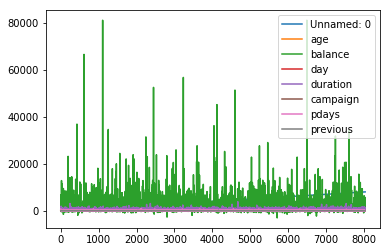

In [5]:
%matplotlib inline
plt.figure(); df.plot()

In [6]:
wszystkie=np.array(train)
x=wszystkie[:,:-1]
y=wszystkie[:,-1]


In [7]:
x

array([[60, 'services', 'married', ..., 761, 1, 'other'],
       [25, 'student', 'single', ..., 180, 2, 'failure'],
       [38, 'services', 'married', ..., 344, 1, 'failure'],
       ..., 
       [32, 'blue-collar', 'married', ..., -1, 0, 'unknown'],
       [50, 'management', 'married', ..., 98, 2, 'other'],
       [33, 'management', 'single', ..., -1, 0, 'unknown']], dtype=object)

In [8]:
y

array(['yes', 'yes', 'no', ..., 'yes', 'yes', 'no'], dtype=object)

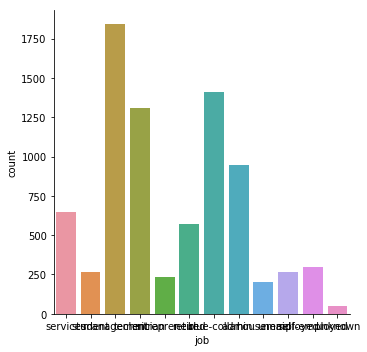

In [25]:
sns.factorplot('job',data=df,kind='count')


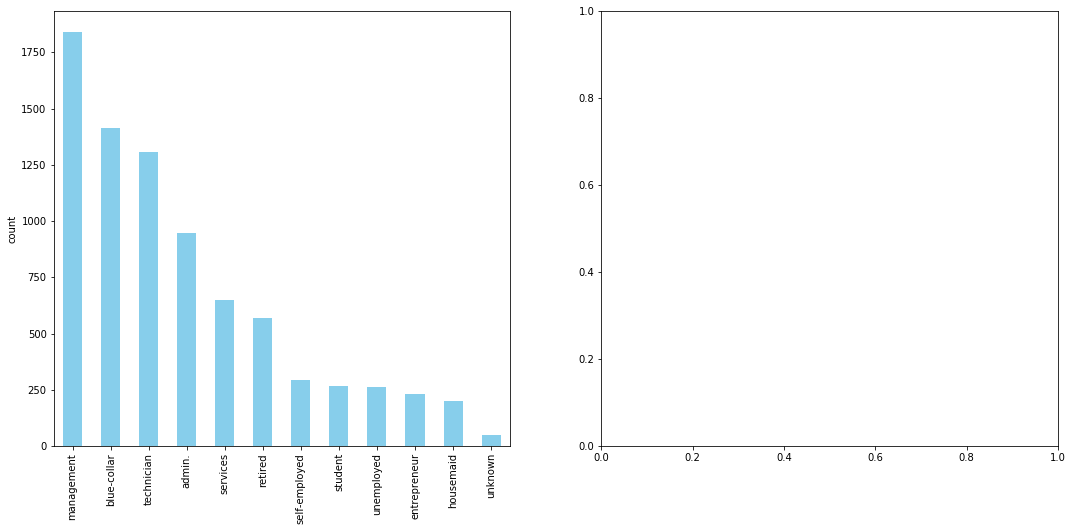

In [21]:


fig, ax = plt.subplots(1,2,figsize = (18, 8))
train["job"].value_counts().plot.bar(color = "skyblue", ax = ax[0])
ax[0].set_ylabel("count")
plt.show()